In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end])
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi), 1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)
amplitude = 40
slope = 0.05
noise_level = 5

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [26]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=7e-6, momentum=0.9)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(dataset, epochs=500)
print(f"Layer weights {l0.get_weights()}")

Epoch 1/500
31/31 [==============================] - 0s 11ms/step - loss: 754.0705
Epoch 2/500
31/31 [==============================] - 0s 4ms/step - loss: 138.0007
Epoch 3/500
31/31 [==============================] - 0s 4ms/step - loss: 109.6098
Epoch 4/500
31/31 [==============================] - 0s 4ms/step - loss: 100.9568
Epoch 5/500
31/31 [==============================] - 0s 4ms/step - loss: 84.4438
Epoch 6/500
31/31 [==============================] - 0s 4ms/step - loss: 81.8545
Epoch 7/500
31/31 [==============================] - 0s 4ms/step - loss: 70.9491
Epoch 8/500
31/31 [==============================] - 0s 4ms/step - loss: 71.1033
Epoch 9/500
31/31 [==============================] - 0s 5ms/step - loss: 67.7623
Epoch 10/500
31/31 [==============================] - 0s 5ms/step - loss: 62.2229
Epoch 11/500
31/31 [==============================] - 0s 4ms/step - loss: 62.0367
Epoch 12/500
31/31 [==============================] - 0s 4ms/step - loss: 61.4144
Epoch 13/500
31/31 [

Epoch 101/500
31/31 [==============================] - 0s 4ms/step - loss: 39.3804
Epoch 102/500
31/31 [==============================] - 0s 4ms/step - loss: 40.6782
Epoch 103/500
31/31 [==============================] - 0s 4ms/step - loss: 38.8437
Epoch 104/500
31/31 [==============================] - 0s 4ms/step - loss: 39.3556
Epoch 105/500
31/31 [==============================] - 0s 4ms/step - loss: 39.6092
Epoch 106/500
31/31 [==============================] - 0s 5ms/step - loss: 41.7600
Epoch 107/500
31/31 [==============================] - 0s 4ms/step - loss: 38.7408
Epoch 108/500
31/31 [==============================] - 0s 4ms/step - loss: 39.7518
Epoch 109/500
31/31 [==============================] - 0s 4ms/step - loss: 42.4561
Epoch 110/500
31/31 [==============================] - 0s 4ms/step - loss: 40.9518
Epoch 111/500
31/31 [==============================] - 0s 4ms/step - loss: 39.3992
Epoch 112/500
31/31 [==============================] - 0s 4ms/step - loss: 39.0085
Epoc

31/31 [==============================] - 0s 5ms/step - loss: 36.9280
Epoch 298/500
31/31 [==============================] - 0s 4ms/step - loss: 36.5199
Epoch 299/500
31/31 [==============================] - 0s 4ms/step - loss: 36.9427
Epoch 300/500
31/31 [==============================] - 0s 4ms/step - loss: 35.7325
Epoch 301/500
31/31 [==============================] - 0s 4ms/step - loss: 37.5574
Epoch 302/500
31/31 [==============================] - 0s 4ms/step - loss: 37.2290
Epoch 303/500
31/31 [==============================] - 0s 4ms/step - loss: 36.9064
Epoch 304/500
31/31 [==============================] - 0s 4ms/step - loss: 36.2700
Epoch 305/500
31/31 [==============================] - 0s 4ms/step - loss: 35.7081
Epoch 306/500
31/31 [==============================] - 0s 4ms/step - loss: 36.6483
Epoch 307/500
31/31 [==============================] - 0s 4ms/step - loss: 35.7954
Epoch 308/500
31/31 [==============================] - 0s 4ms/step - loss: 37.6562
Epoch 309/500
31/3

31/31 [==============================] - 0s 4ms/step - loss: 36.5427
Epoch 494/500
31/31 [==============================] - 0s 4ms/step - loss: 38.2303
Epoch 495/500
31/31 [==============================] - 0s 4ms/step - loss: 34.8303
Epoch 496/500
31/31 [==============================] - 0s 4ms/step - loss: 34.6265
Epoch 497/500
31/31 [==============================] - 0s 4ms/step - loss: 34.6545
Epoch 498/500
31/31 [==============================] - 0s 4ms/step - loss: 33.8122
Epoch 499/500
31/31 [==============================] - 0s 4ms/step - loss: 33.6651
Epoch 500/500
31/31 [==============================] - 0s 4ms/step - loss: 33.9595
Layer weights [array([[-0.04657948],
       [ 0.02286583],
       [ 0.00124447],
       [-0.01380847],
       [ 0.09727062],
       [-0.04244929],
       [-0.03950863],
       [-0.02832936],
       [ 0.12227142],
       [-0.02495609],
       [-0.02978145],
       [-0.07227601],
       [ 0.00114593],
       [ 0.08621783],
       [ 0.05391929],
     

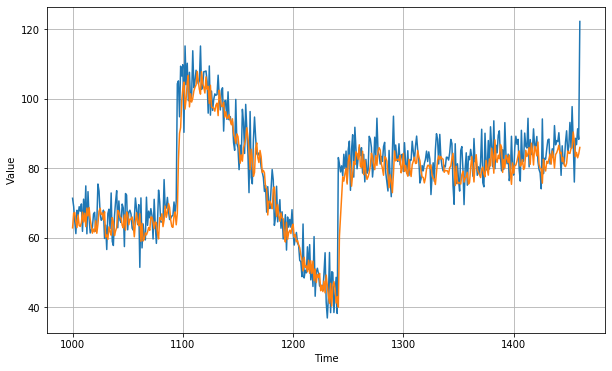

In [18]:
from tqdm.notebook import tqdm

forecast = []

for time in tqdm(range(len(series) - window_size)):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time - window_size:]
results = np.array(forecast)[:, 0, 0]
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [19]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.2062397

[1e-08, 0.001, 0, 300]

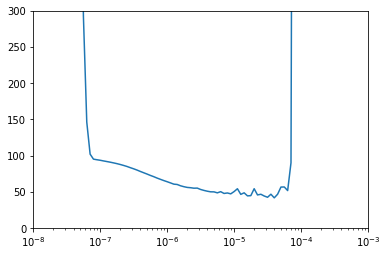

In [25]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])